Pentru a organiza mai usor datasetul, modelele si imaginile cream o constanta HOME.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


Instalam YOLO11 prin Ultralytics

In [ ]:
%pip install ultralytics supervision roboflow --upgrade
import ultralytics
ultralytics.checks()

Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 41.4/112.6 GB disk)


Ne asiguram ca data este localizata in datasets cand este descarcata din roboflow.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="geOj696uuUroyxqDwMQX")
project = rf.workspace("licenta2").project("pests-auto-dataset-fp9rc")
version = project.version(3)
dataset = version.download("yolov12")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pests-auto-dataset-3 in yolov12:: 100%|██████████| 34378/34378 [00:04<00:00, 8369.49it/s] 


In [ ]:
!realpath datasets

/content/datasets/datasets


Custom training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo12n.pt data={dataset.location}/data.yaml epochs=120 batch=64 imgsz=640 plots=True

/content
100% 5.34M/5.34M [00:00<00:00, 88.3MB/s]
Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=/content/datasets/pests-auto-dataset-3/data.yaml, epochs=120, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml			 R_curve.png	       train_batch2.jpg
confusion_matrix_normalized.png  results.csv	       val_batch0_labels.jpg
confusion_matrix.png		 results.png	       val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg      val_batch1_pred.jpg
labels.jpg			 train_batch28160.jpg  val_batch2_labels.jpg
P_curve.png			 train_batch28161.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch28162.jpg  weights


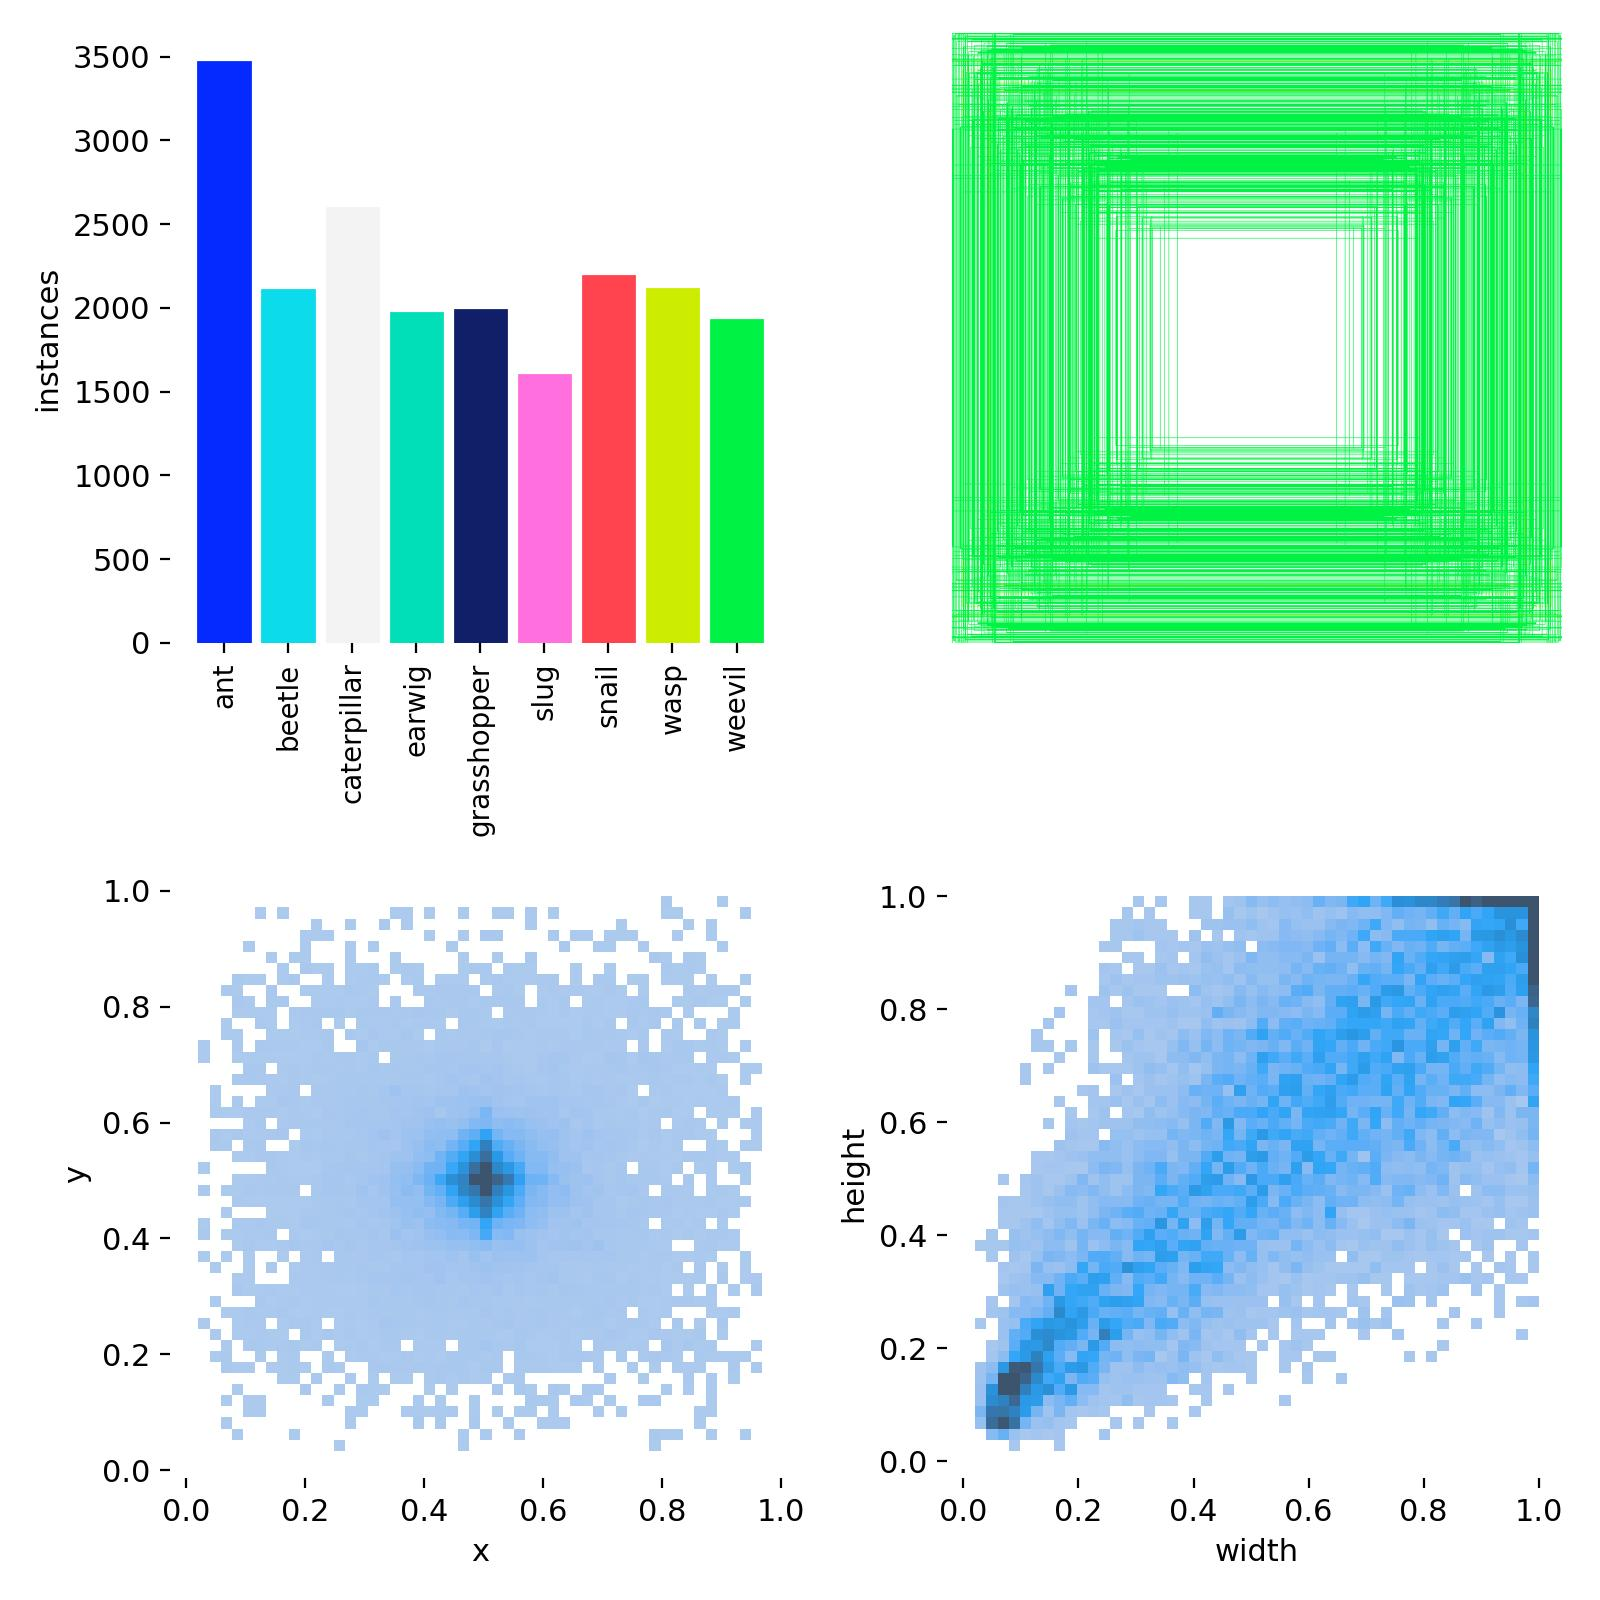

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/labels.jpg', width=600)

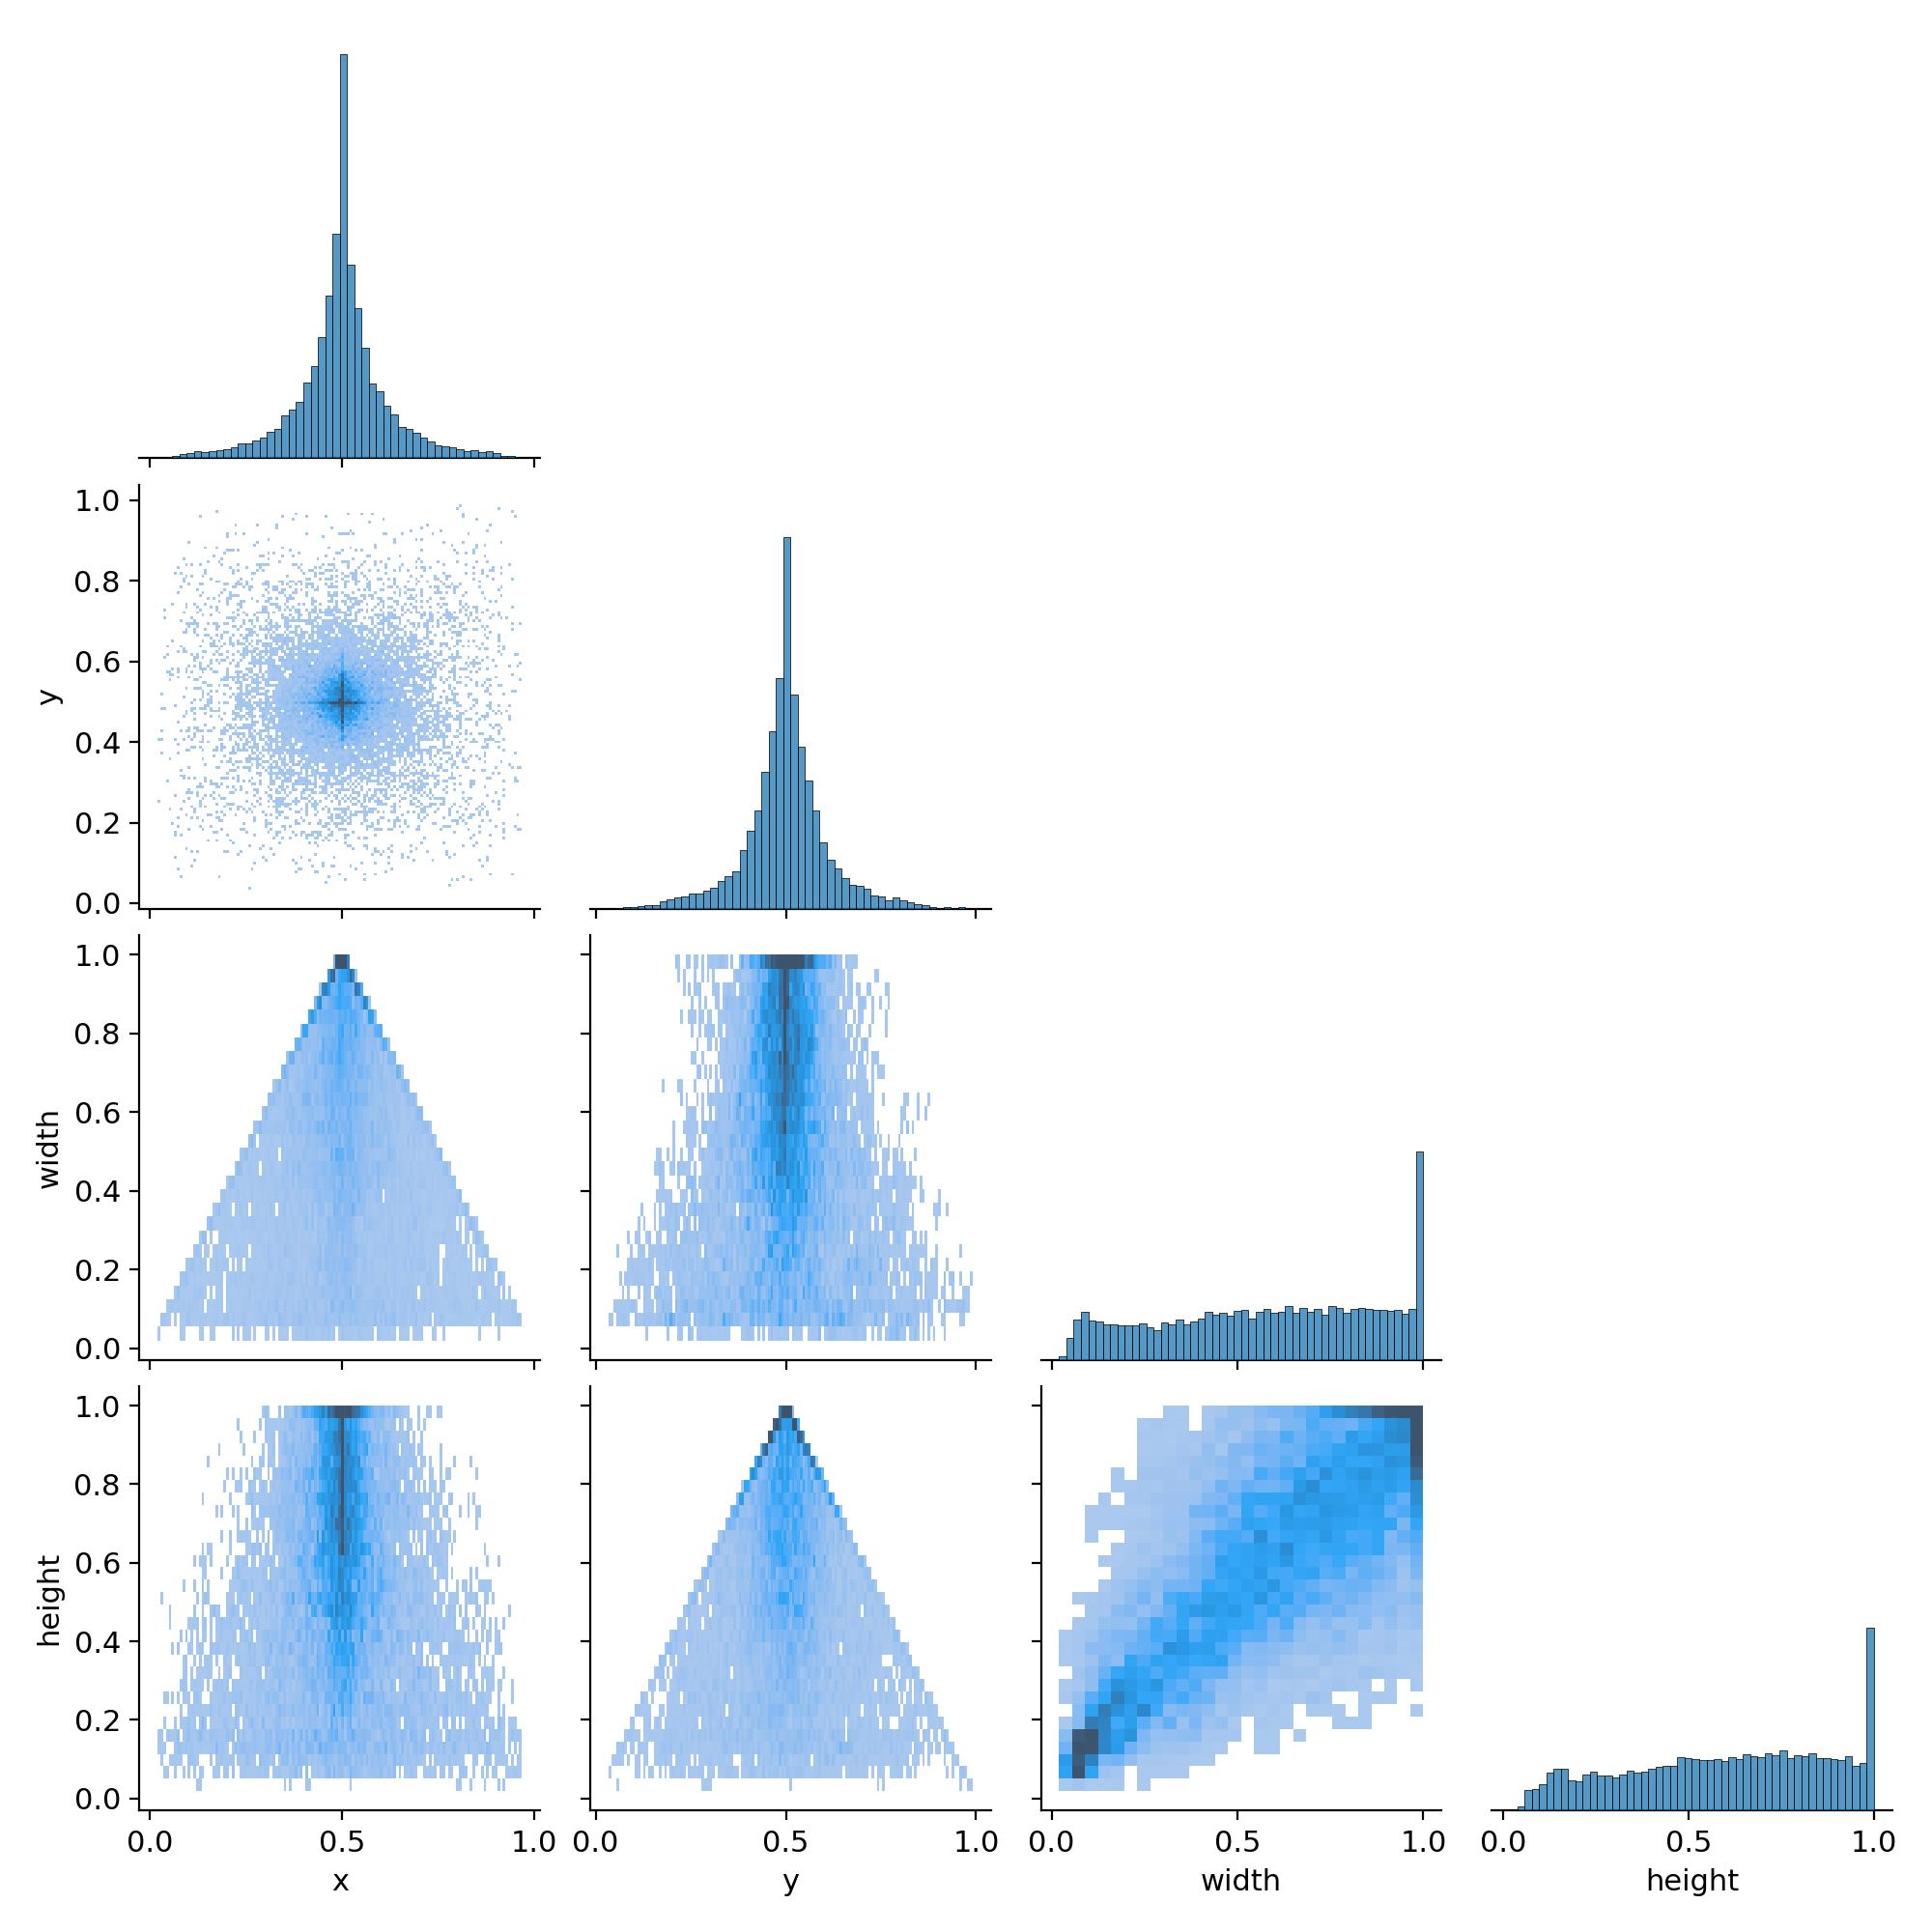

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/labels_correlogram.jpg', width=600)

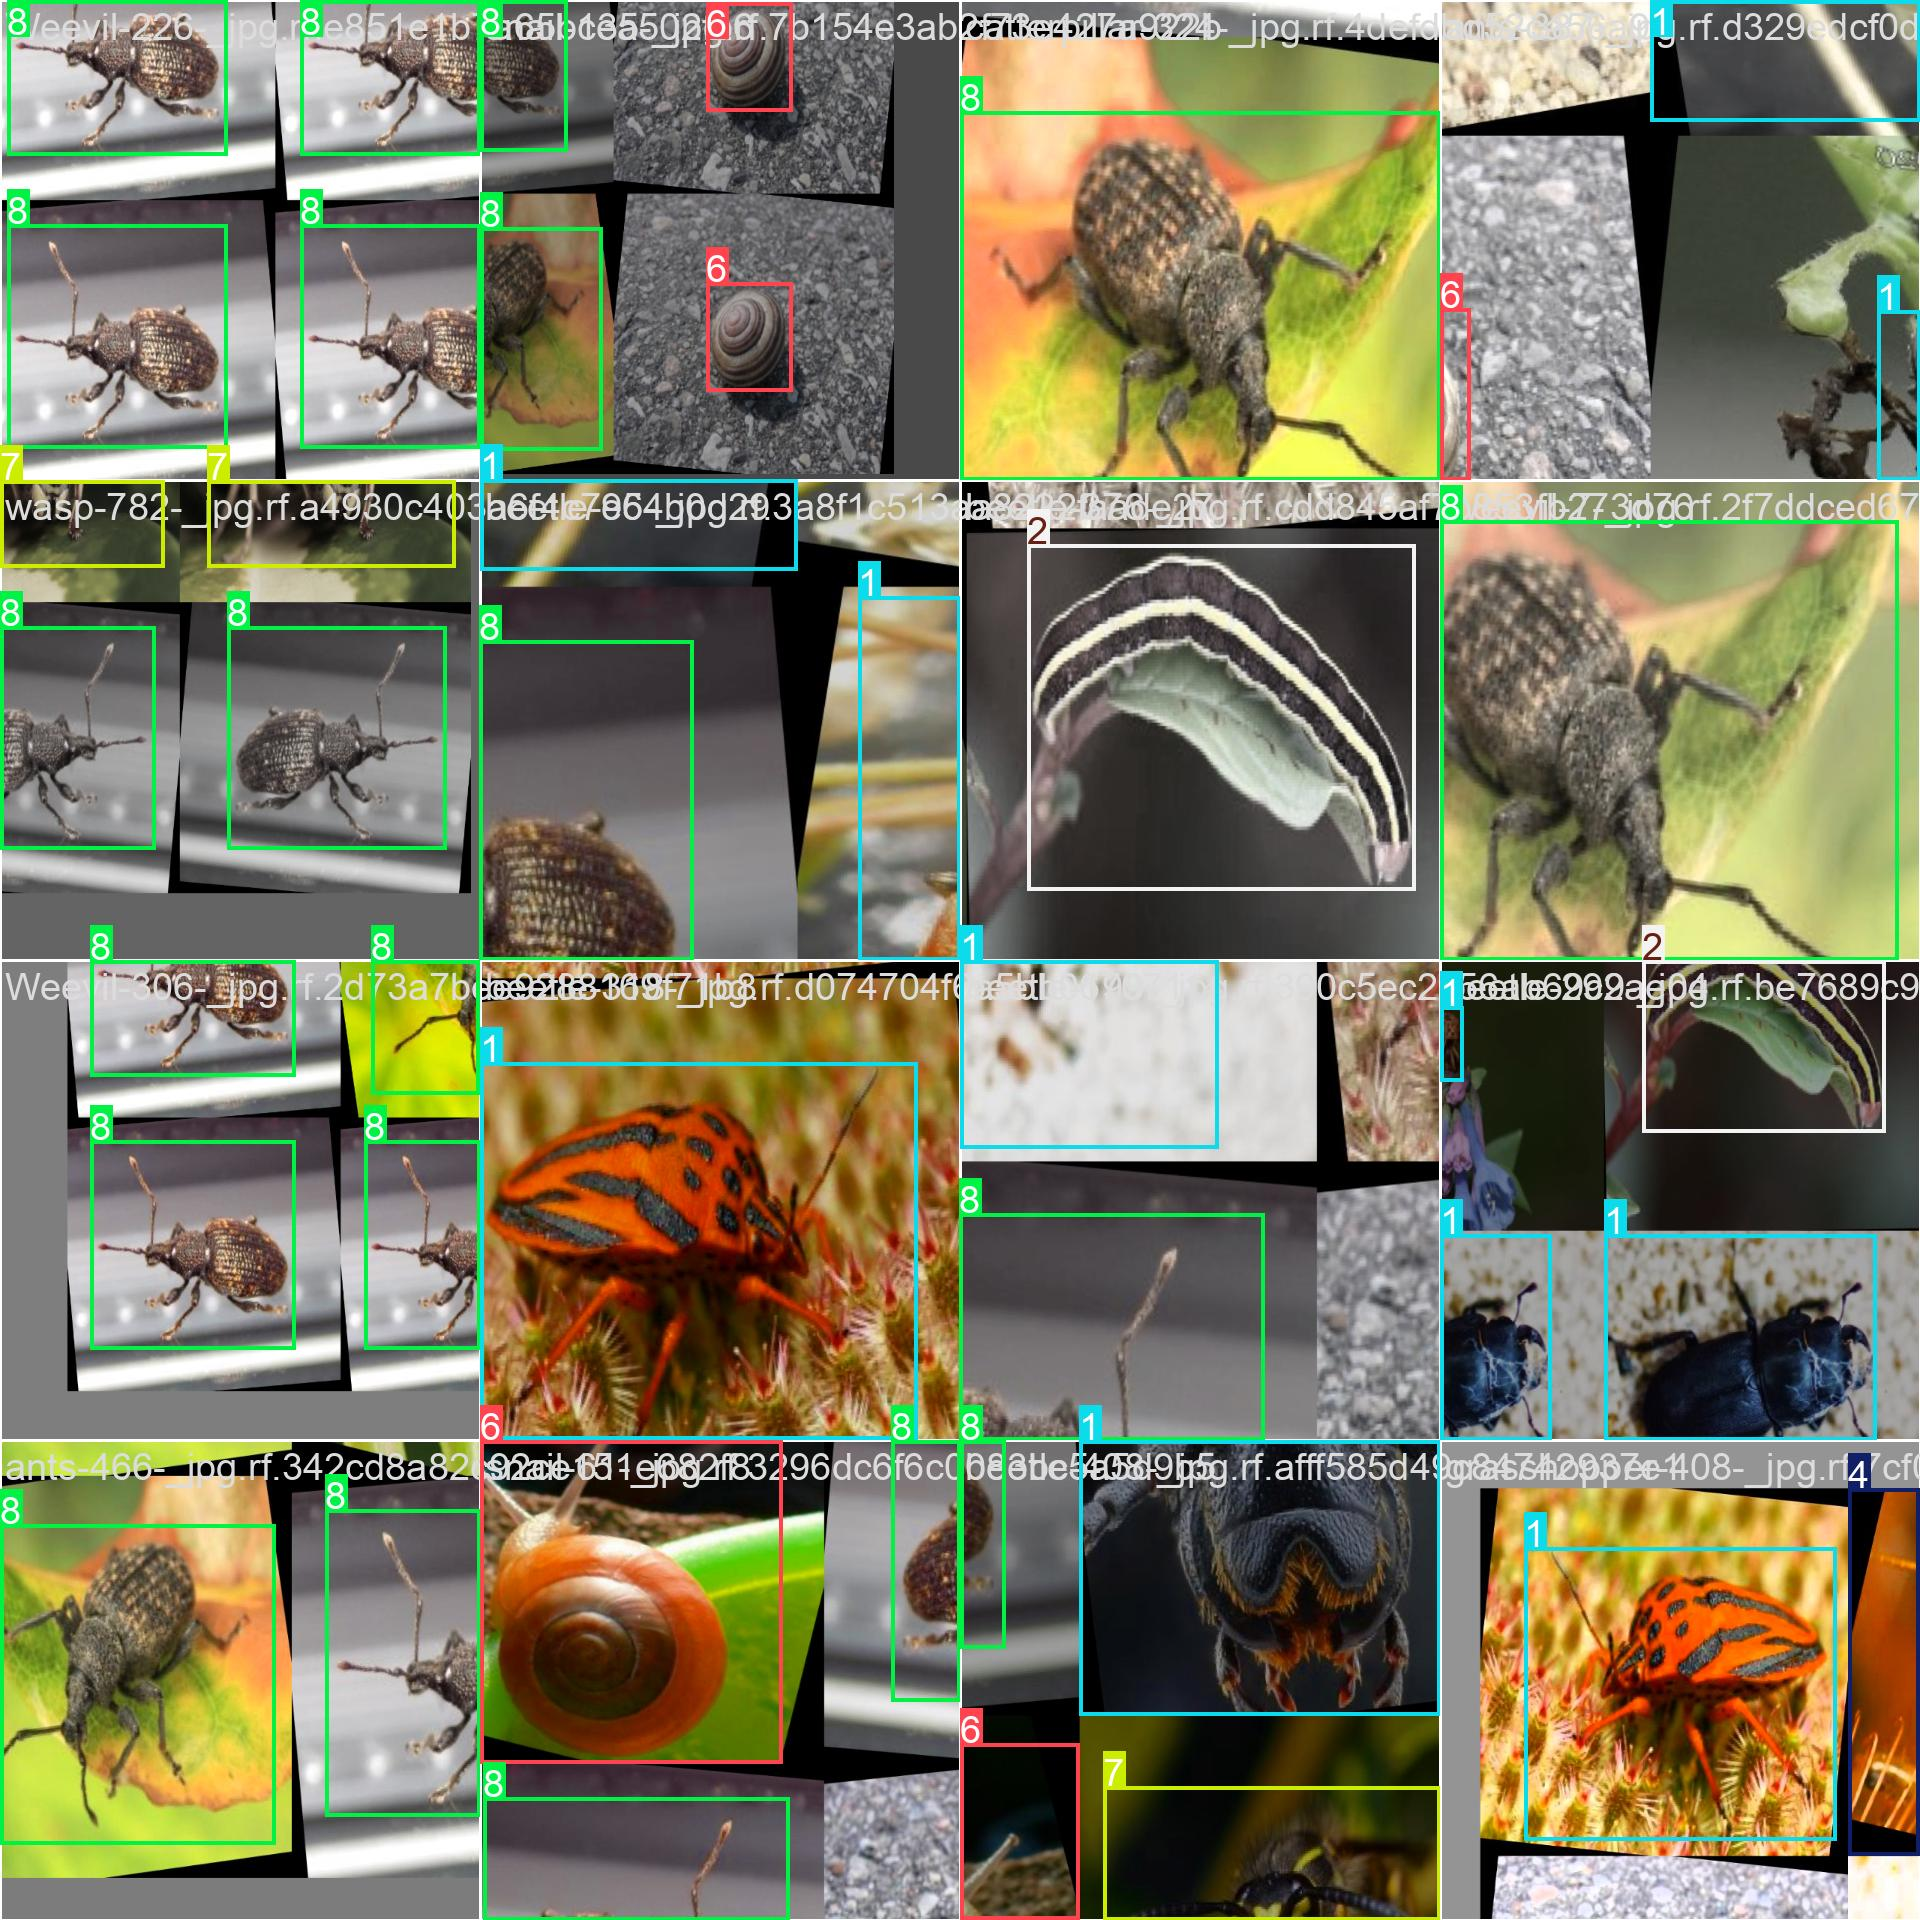

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

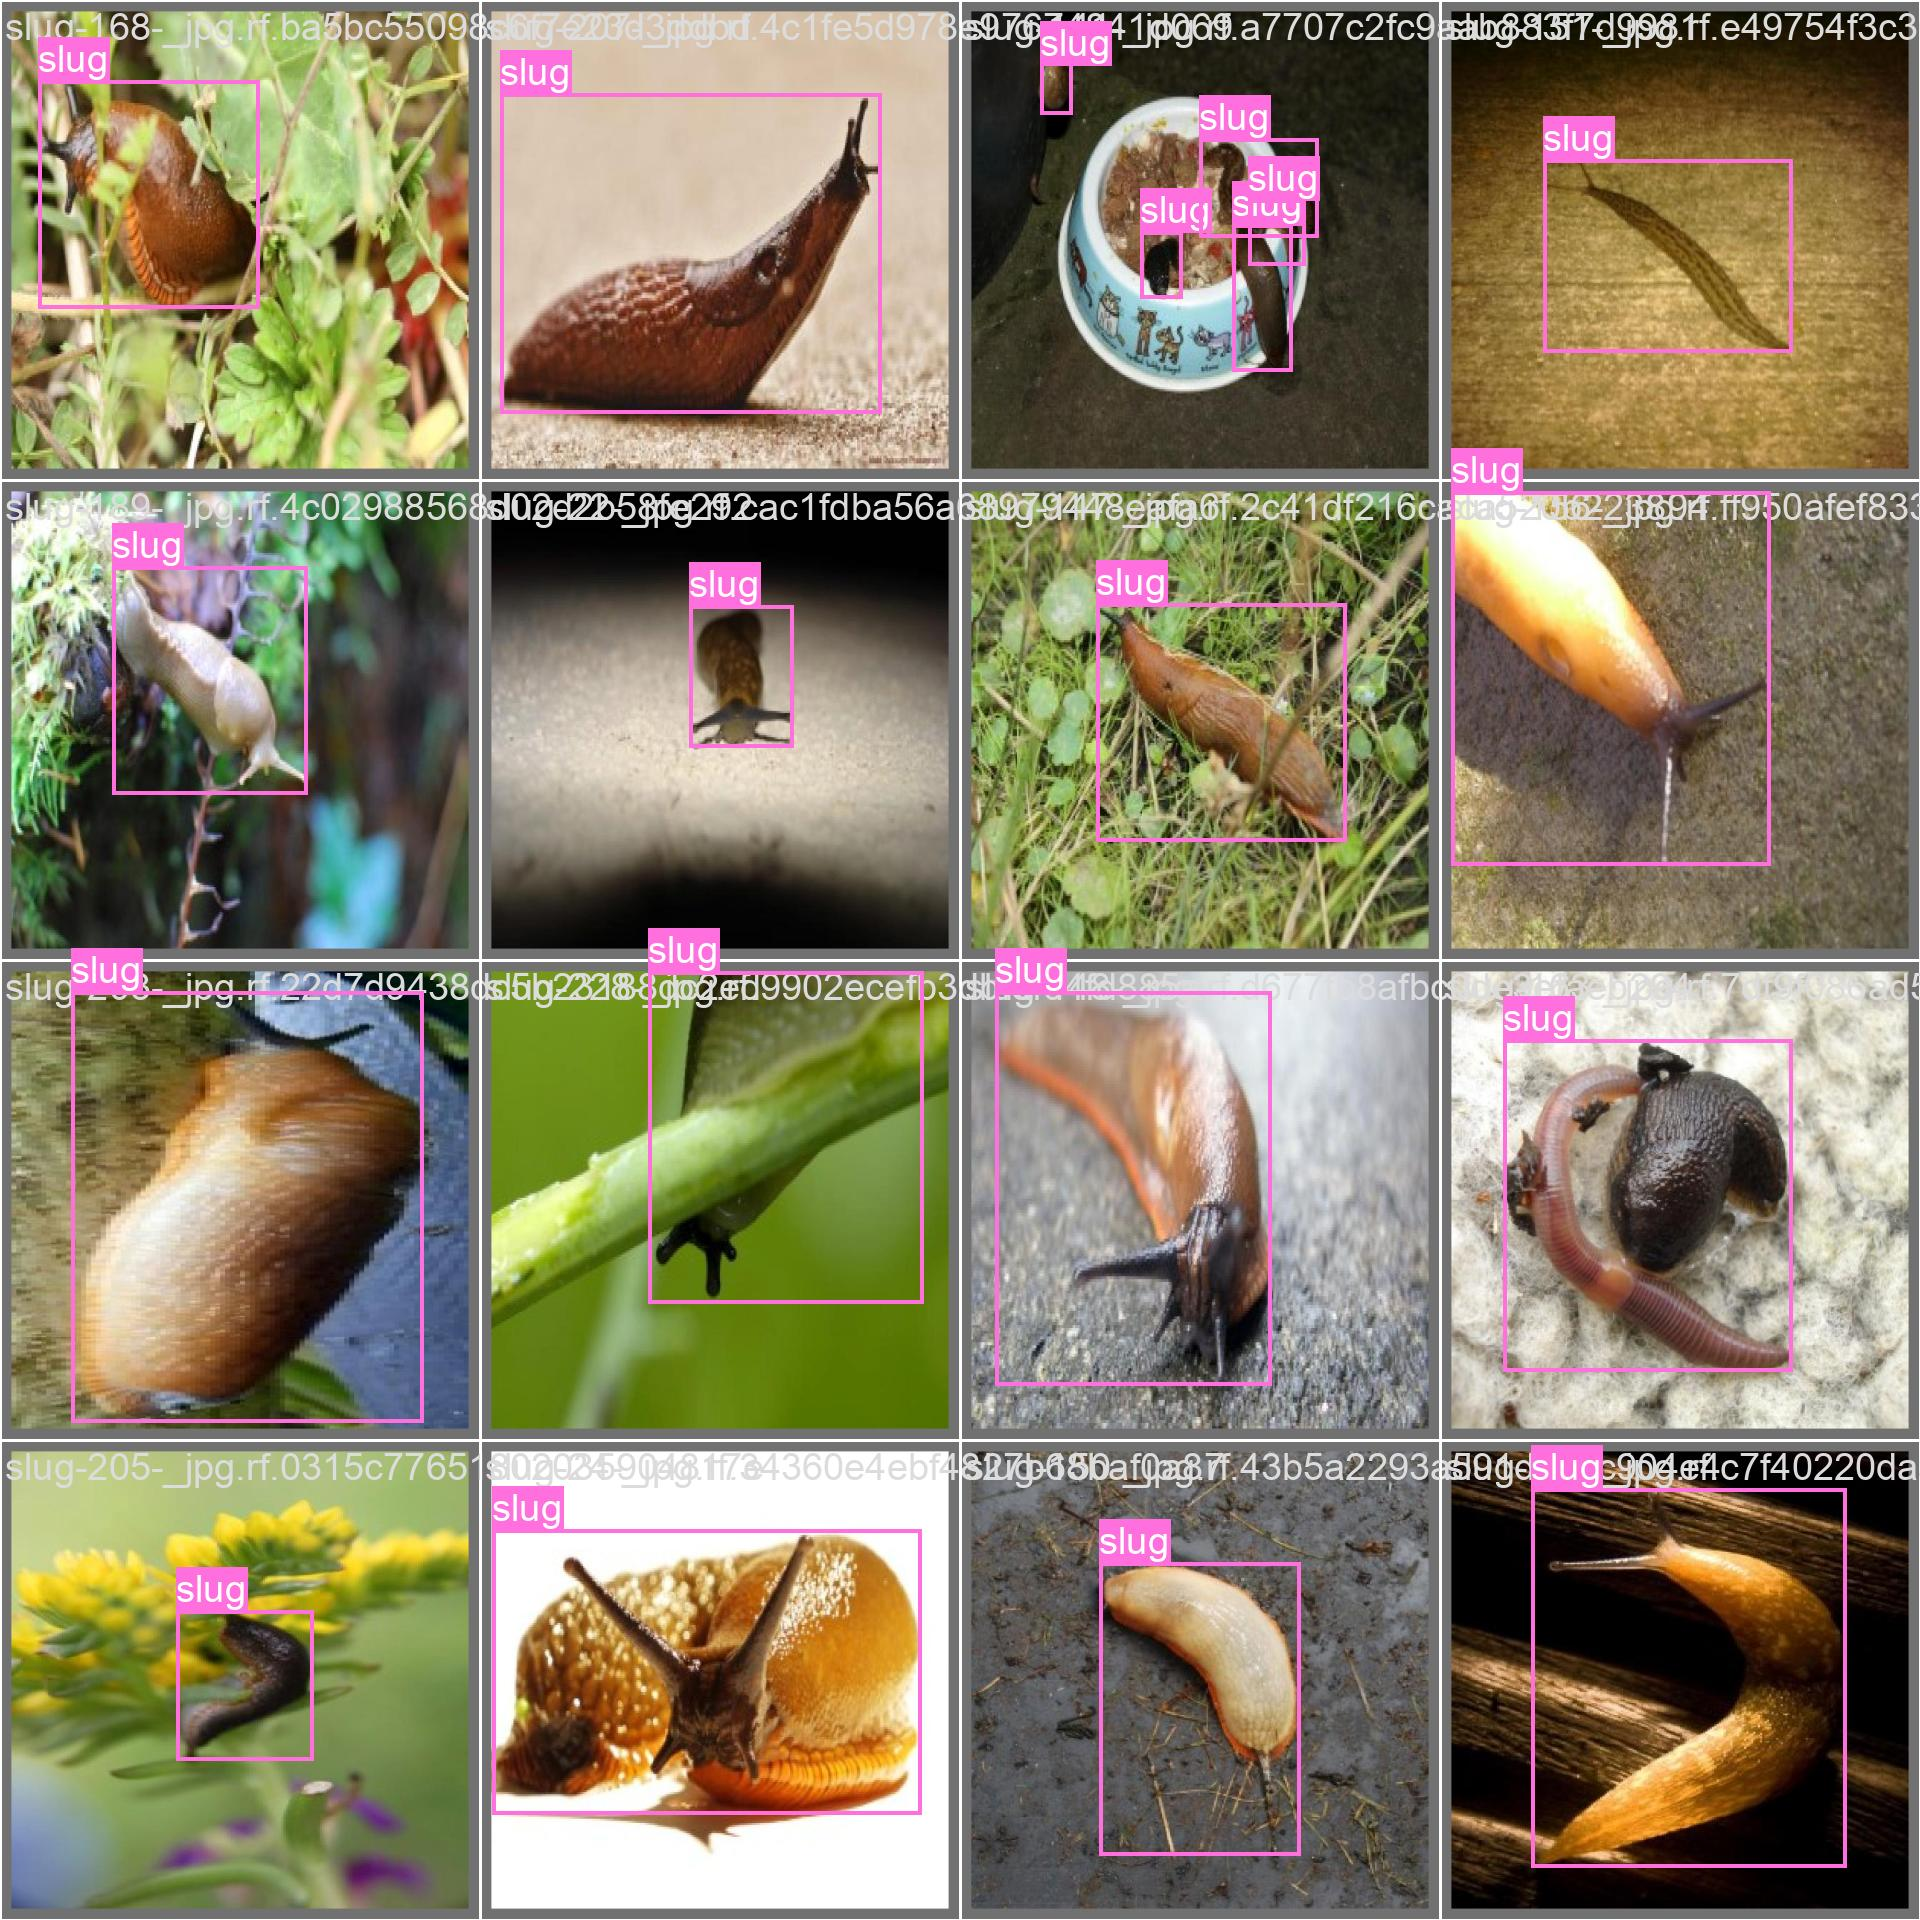

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch2_labels.jpg', width=600)

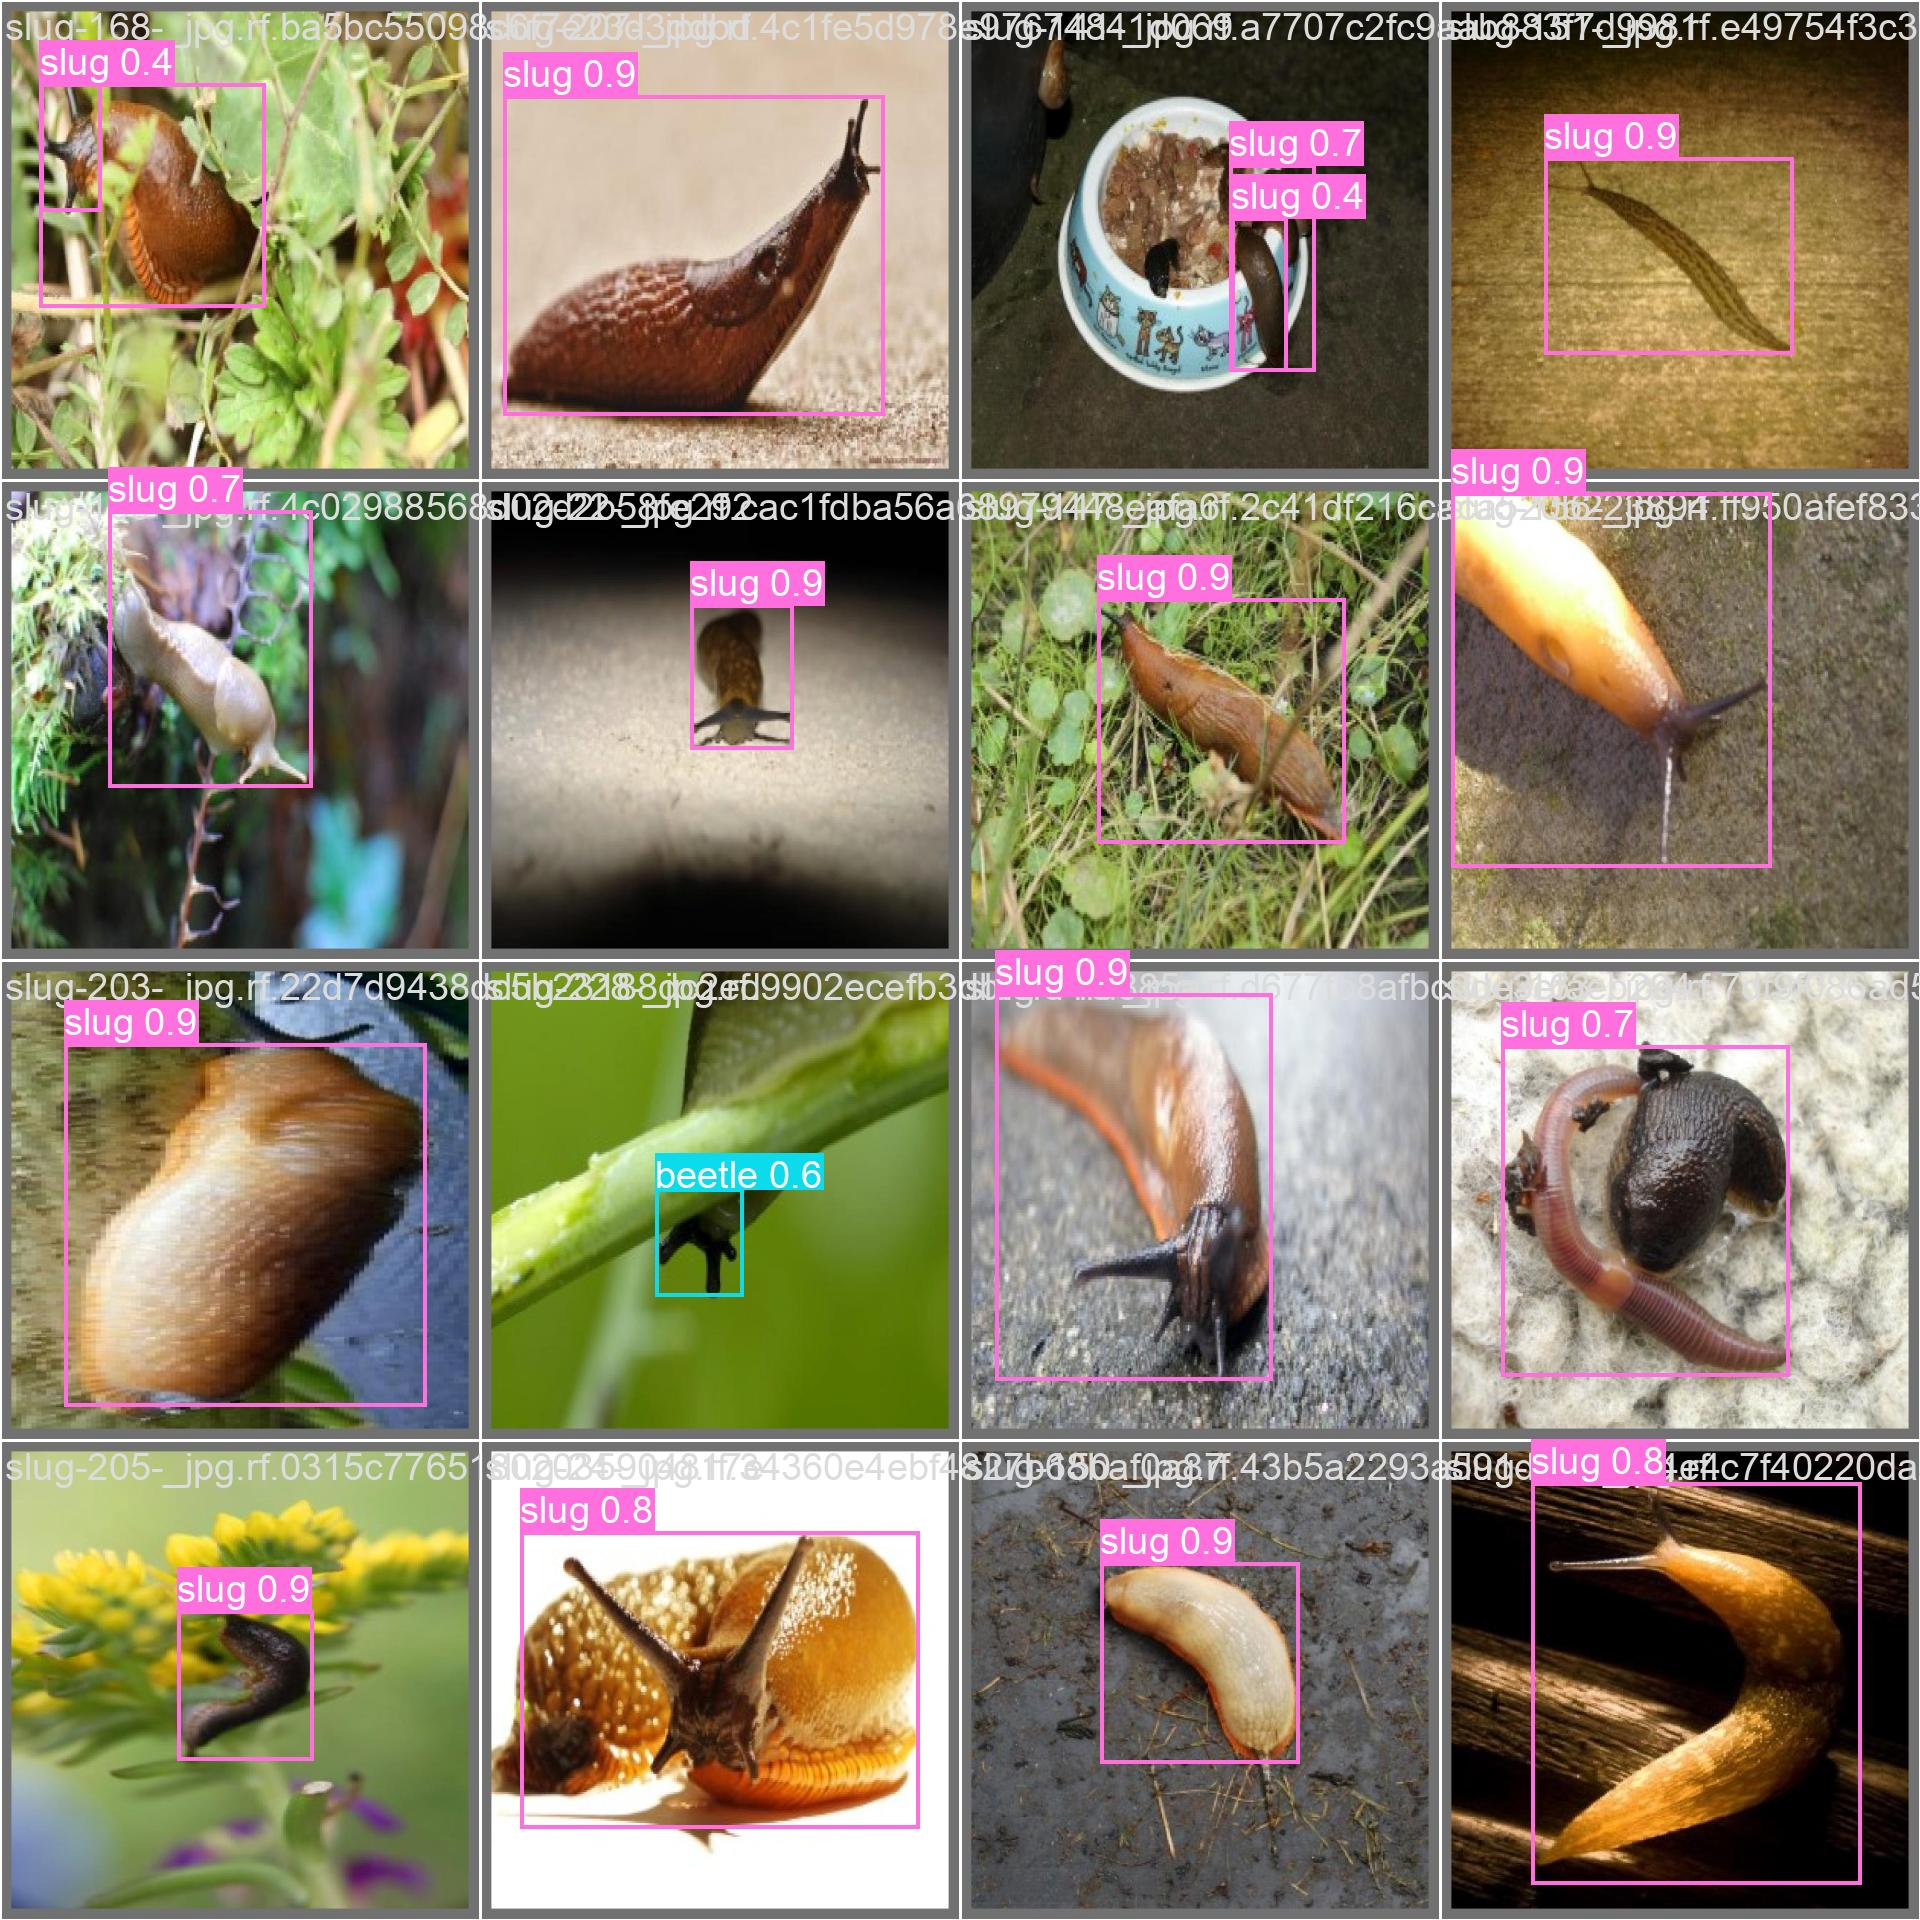

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

In [ ]:
import pandas as pd

# Încarcă fișierul CSV
csv_path = f"{HOME}/runs/detect/train/results.csv"
df = pd.read_csv(csv_path)

# Setează Pandas să afișeze toate rândurile
pd.set_option("display.max_rows", None)

# Afișează întregul DataFrame
df


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,169.434,1.14340,3.21081,1.59445,0.54770,0.45063,0.49354,0.32096,1.15212,1.91989,1.73258,0.003320,0.003320,0.003320
1,2,338.102,1.16600,2.25298,1.57475,0.47735,0.50983,0.46647,0.28665,1.37107,2.27105,2.12825,0.006599,0.006599,0.006599
2,3,506.911,1.28879,2.27149,1.68495,0.16738,0.31847,0.17701,0.07254,1.92682,4.41803,2.84279,0.009822,0.009822,0.009822
3,4,675.561,1.33480,2.16334,1.72329,0.52222,0.41224,0.41414,0.23978,1.50655,2.43100,2.25112,0.009753,0.009753,0.009753
4,5,844.192,1.24829,1.83680,1.64142,0.68053,0.50204,0.59043,0.35591,1.43429,1.72488,2.05580,0.009670,0.009670,0.009670
5,6,1012.530,1.19013,1.66449,1.58589,0.68315,0.57682,0.64229,0.39857,1.23715,1.46410,1.82455,0.009588,0.009588,0.009588
6,7,1180.710,1.15120,1.55176,1.55575,0.52960,0.55861,0.55571,0.37704,1.18432,1.85416,1.75921,0.009505,0.009505,0.009505
7,8,1349.200,1.12020,1.47083,1.52565,0.72683,0.62346,0.70919,0.48860,1.09219,1.15169,1.65115,0.009423,0.009423,0.009423
8,9,1517.720,1.09298,1.40075,1.50240,0.74255,0.71641,0.76009,0.52928,1.03987,1.04955,1.62898,0.009340,0.009340,0.009340
9,10,1686.100,1.06572,1.33558,1.47784,0.74907,0.73136,0.76990,0.56561,0.96757,1.00131,1.53863,0.009258,0.009258,0.009258



--- Generare Grafice din /content/runs/detect/train/results.csv ---


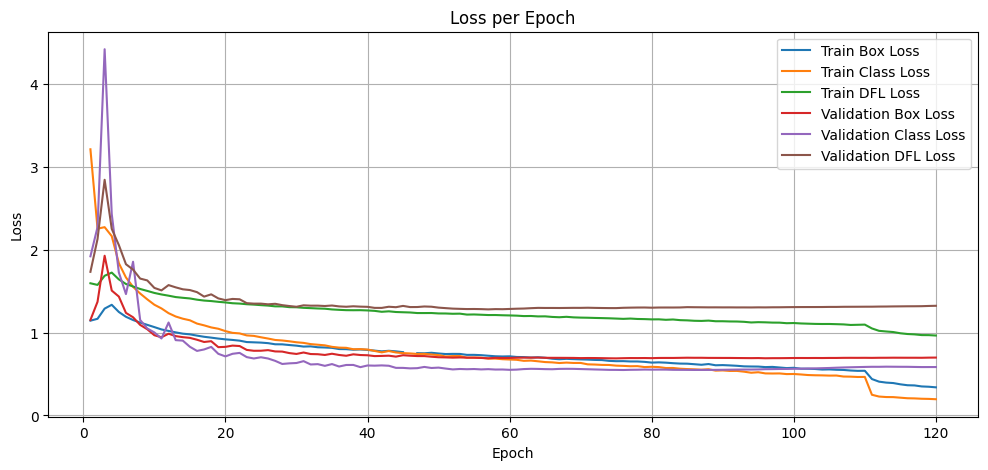

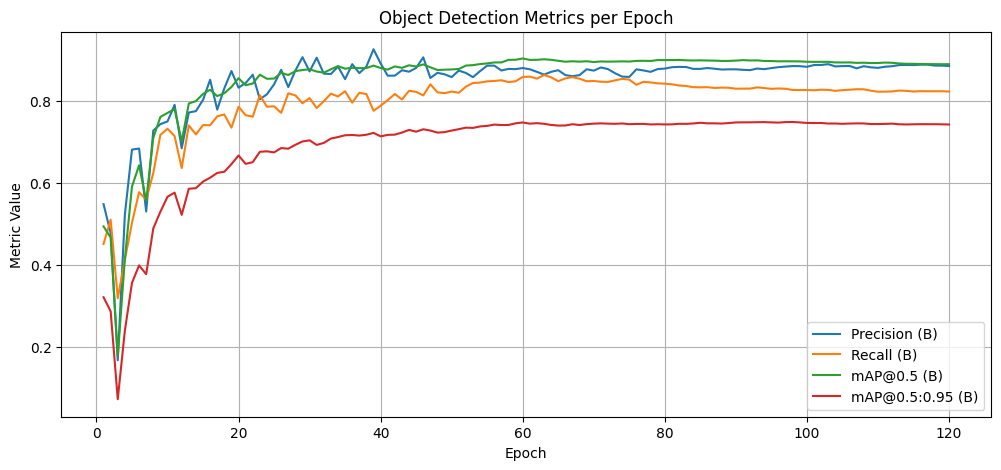

--- Sfârșit Generare Grafice ---


In [ ]:
import matplotlib.pyplot as plt

print(f"\n--- Generare Grafice din {csv_path} ---")

if os.path.exists(csv_path):
    results = df # Folosim DataFrame-ul deja încărcat

    # Curăță numele coloanelor (preventiv)
    results.columns = results.columns.str.strip()

    # Verifică dacă coloanele esențiale există
    required_loss_cols = ['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss']
    required_metric_cols = ['epoch', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

    available_cols = set(results.columns)
    missing_loss_cols = [col for col in required_loss_cols if col not in available_cols]
    missing_metric_cols = [col for col in required_metric_cols if col not in available_cols]

    if missing_loss_cols:
        print(f"\nAtenție: Lipsesc coloanele de loss așteptate: {missing_loss_cols}")
        print(f"Coloane disponibile: {results.columns.tolist()}")
    if missing_metric_cols:
        print(f"\nAtenție: Lipsesc coloanele de metrici așteptate: {missing_metric_cols}")
        print(f"Coloane disponibile: {results.columns.tolist()}")

    # --- Grafic Loss (dacă există coloanele) ---
    plot_loss = True
    for col in required_loss_cols:
      if col not in available_cols:
        plot_loss = False
        print(f"\nNu se poate genera graficul Loss: Lipsește coloana '{col}'.")
        break

    if plot_loss:
        plt.figure(figsize=(12, 5))
        plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
        plt.plot(results['epoch'], results['train/cls_loss'], label='Train Class Loss')
        plt.plot(results['epoch'], results['train/dfl_loss'], label='Train DFL Loss')
        plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss')
        plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Class Loss')
        plt.plot(results['epoch'], results['val/dfl_loss'], label='Validation DFL Loss')
        plt.title('Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show() # Afișează graficul

    # --- Grafic Metrici (mAP)dacă există coloanele) ---
    plot_metrics = True
    for col in required_metric_cols:
      if col not in available_cols:
        plot_metrics = False
        print(f"\nNu se poate genera graficul Metrics: Lipsește coloana '{col}'.")
        break

    if plot_metrics:
        plt.figure(figsize=(12, 5))
        plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision (B)')
        plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall (B)')
        plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@0.5 (B)')
        plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@0.5:0.95 (B)')
        plt.title('Object Detection Metrics per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Metric Value')
        plt.legend()
        plt.grid(True)
        plt.show() # Afișează graficul

else:
    # nu va apărea dacă df a fost încărcat cu succes mai sus
    print(f"\nEroare: Fișierul de rezultate nu a fost găsit la calea specificată: '{csv_path}'.")

print("--- Sfârșit Generare Grafice ---")

Validam modelul

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv12n summary (fused): 159 layers, 2,558,483 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 993.8±316.2 MB/s, size: 39.4 KB)
val: Scanning /content/datasets/pests-auto-dataset-3/valid/labels.cache... 409 images, 0 backgrounds, 0 corrupt: 100% 409/409 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 26/26 [00:03<00:00,  6.91it/s]
                   all        409        492      0.884      0.826      0.896      0.747
                   ant         50         87      0.826      0.707        0.8      0.575
                beetle         41         42      0.773      0.786      0.837      0.704
           caterpillar         40         74      0.915      0.582      0.771        0.5
                earwig         45         46      0.934       0.93      0.969      0.777
           grasshopper         47  

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/last.pt data={dataset.location}/data.yaml

Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv12n summary (fused): 159 layers, 2,558,483 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1241.9±487.7 MB/s, size: 47.6 KB)
val: Scanning /content/datasets/pests-auto-dataset-3/valid/labels.cache... 409 images, 0 backgrounds, 0 corrupt: 100% 409/409 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 26/26 [00:03<00:00,  7.09it/s]
                   all        409        492      0.884      0.822      0.889      0.742
                   ant         50         87      0.851      0.721      0.807      0.573
                beetle         41         42      0.824      0.783      0.817      0.694
           caterpillar         40         74      0.908      0.534      0.728       0.49
                earwig         45         46      0.921      0.935      0.977      0.788
           grasshopper         47 

Descarcam modelul

In [ ]:
from google.colab import files
model_path = "/content/runs/detect/train/weights/best.pt"

files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
model_path = "/content/runs/detect/train/weights/last.pt"

files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Comprimă zip
!zip -r /content/runs.zip /content/runs

from google.colab import files

files.download('/content/runs.zip')

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val2/ (stored 0%)
  adding: content/runs/detect/val2/R_curve.png (deflated 7%)
  adding: content/runs/detect/val2/val_batch0_pred.jpg (deflated 10%)
  adding: content/runs/detect/val2/confusion_matrix_normalized.png (deflated 17%)
  adding: content/runs/detect/val2/confusion_matrix.png (deflated 23%)
  adding: content/runs/detect/val2/val_batch2_pred.jpg (deflated 8%)
  adding: content/runs/detect/val2/val_batch0_labels.jpg (deflated 10%)
  adding: content/runs/detect/val2/P_curve.png (deflated 8%)
  adding: content/runs/detect/val2/val_batch1_labels.jpg (deflated 7%)
  adding: content/runs/detect/val2/val_batch1_pred.jpg (deflated 7%)
  adding: content/runs/detect/val2/F1_curve.png (deflated 7%)
  adding: content/runs/detect/val2/val_batch2_labels.jpg (deflated 8%)
  adding: content/runs/detect/val2/PR_curve.png (deflated 11%)
  adding: content/runs/detect/train/ (stored 0%)
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

#import os
#from google.colab import files

# Definește calea către director
#path_to_download = '/content'

# Iterează prin fișierele și directoarele din calea specificată
#for root, dirs, files_list in os.walk(path_to_download):
    # Descarcă fiecare fișier
#    for file in files_list:
#        # Creează calea completă către fișier
#        file_path = os.path.join(root, file)
        # Descarcă fișierul
#        files.download(file_path)
